## Data Loading and Overview

### Import Libraries and Load Data

In [2]:
!pip install pandas

import pandas as pd

In [3]:
data = pd.read_csv('SMSSpamCollection', delimiter='\t', header=None, names=['label', 'message'])

### Dataset Overview

In [4]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#shape, columns, and data types of the database

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


### Class Balance and Basic Statistics

In [6]:
#how many messages are labeled as "spam" vs. "ham"

class_balance = data['label'].value_counts()

print(class_balance)

ham     4825
spam     747
Name: label, dtype: int64


In [7]:
data['length'] = data['message'].apply(len)
print(data.groupby('label')['length'].describe())

        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0


## Exploratory Data Analysis (EDA)

### Word Frequency Analysis

In [8]:
from collections import Counter

# Function to generate word frequency counter for a given series
def generate_word_freq(series):
    return Counter(" ".join(series).split())

# Function to find the most common words in a given series
def most_common_words(series, top_n=20):
    word_freq = generate_word_freq(series)
    return word_freq.most_common(top_n)

In [9]:
print("Most common words in unprocessed spam messages:")
print(most_common_words(data[data['label'] == 'spam']['message']))

print("\nMost common words in unprocessed ham messages:")
print(most_common_words(data[data['label'] == 'ham']['message']))

Most common words in unprocessed spam messages:
[('to', 607), ('a', 360), ('your', 187), ('call', 185), ('or', 185), ('the', 178), ('2', 169), ('for', 169), ('you', 164), ('is', 143), ('Call', 136), ('on', 136), ('have', 128), ('and', 119), ('from', 116), ('ur', 107), ('with', 101), ('&', 98), ('4', 93), ('of', 93)]

Most common words in unprocessed ham messages:
[('to', 1538), ('you', 1462), ('I', 1439), ('the', 1029), ('a', 977), ('i', 742), ('and', 739), ('in', 736), ('u', 651), ('is', 645), ('my', 621), ('me', 541), ('of', 499), ('for', 481), ('that', 399), ('it', 376), ('your', 374), ('on', 352), ('have', 349), ('at', 334)]


### Visualization of Word Clouds

Word cloud for spam:


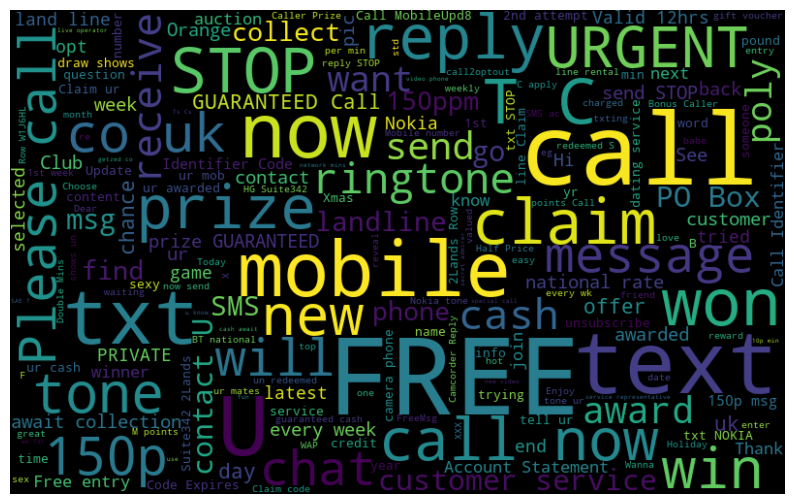

Word cloud for ham:


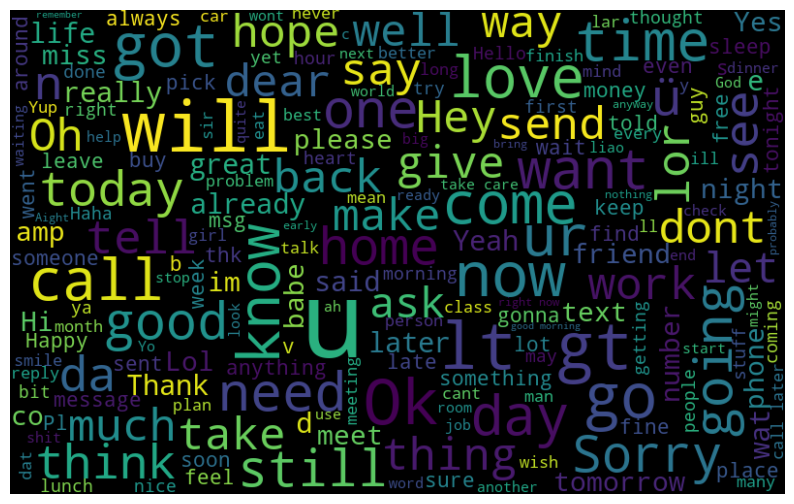

In [10]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize_wordcloud(series):
    text = ' '.join(series)
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

print("Word cloud for spam:")
visualize_wordcloud(data[data['label'] == 'spam']['message'])

print("Word cloud for ham:")
visualize_wordcloud(data[data['label'] == 'ham']['message'])

### Sparse word analysis (to potentially add to stop words) 

In [11]:
word_freq = generate_word_freq(data['message'])

# Sparse word analysis
sparse_words = [word for word, count in word_freq.items() if count == 1]
print(f"Number of sparse words: {len(sparse_words)}")
print(sparse_words[:20])  # prints the first 20 sparse words

Number of sparse words: 9334
['jurong', 'point,', 'crazy..', 'buffet...', 'Cine', 'amore', 'Joking', 'Tb', 'chgs', 'aids', 'patent.', 'cried', 'breather.', 'granted', 'fulfil', 'SUNDAY', 'WILL!!', 'XXXMobileMovieClub:', 'credit,', 'here>>']


### Number of Emails and URLs in spam vs. ham

In [12]:
data['num_urls'] = data['message'].apply(lambda x: len([w for w in x.split() if 'http://' in w or 'https://' in w]))
data['num_emails'] = data['message'].apply(lambda x: len([w for w in x.split() if '@' in w]))

print("Average number of URLs in spam vs. ham:")
print(data.groupby('label')['num_urls'].mean())
print("\nAverage number of emails in spam vs. ham:")
print(data.groupby('label')['num_emails'].mean())

Average number of URLs in spam vs. ham:
label
ham     0.000000
spam    0.025435
Name: num_urls, dtype: float64

Average number of emails in spam vs. ham:
label
ham     0.002694
spam    0.033467
Name: num_emails, dtype: float64


## Data Preprocessing

### Text Preprocessing Functions

In [13]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Downloading the stopwords from nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove punctuation and set to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Stemming and Lemmatization
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthewpirie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthewpirie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthewpirie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Apply Preprocessing

In [14]:
data['processed_message'] = data['message'].apply(preprocess_text)

spam_messages = data[data['label'] == 'spam']['processed_message']
ham_messages = data[data['label'] == 'ham']['processed_message']

## Advanced EDA

### Word Frequency Analysis (after processing)

In [15]:
print("\nMost common words in processed spam messages:")
print(most_common_words(data[data['label'] == 'spam']['processed_message']))

print("\nMost common words in processed ham messages:")
print(most_common_words(data[data['label'] == 'ham']['processed_message']))


Most common words in processed spam messages:
[('call', 365), ('free', 219), ('txt', 169), ('u', 153), ('ur', 144), ('text', 139), ('mobil', 135), ('stop', 118), ('claim', 115), ('repli', 112), ('prize', 94), ('c', 92), ('get', 88), ('tone', 74), ('servic', 72), ('send', 71), ('new', 69), ('nokia', 68), ('award', 66), ('urgent', 63)]

Most common words in processed ham messages:
[('u', 1062), ('go', 447), ('get', 359), ('gt', 318), ('lt', 316), ('come', 298), ('call', 293), ('ok', 262), ('know', 249), ('ur', 247), ('love', 247), ('like', 246), ('got', 245), ('good', 232), ('time', 229), ('day', 218), ('want', 213), ('need', 175), ('one', 175), ('ü', 173)]


### N-Gram Analysis

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to perform bigram analysis
def perform_bigram_analysis(messages):
    # Initialize CountVectorizer for bigrams
    vectorizer = CountVectorizer(ngram_range=(2, 2))

    # Apply it to the given messages
    X = vectorizer.fit_transform(messages)

    # Get feature names (bigrams)
    bigrams = vectorizer.get_feature_names_out()

    # Sum up the counts of each bigram
    bigram_freq = X.sum(axis=0).tolist()[0]

    # Create a dictionary of bigrams and their frequencies
    bigram_freq_dict = dict(zip(bigrams, bigram_freq))

    # Sort the bigrams by their frequency
    return sorted(bigram_freq_dict.items(), key=lambda x: x[1], reverse=True)

In [17]:
spam_bigrams = perform_bigram_analysis(spam_messages)
ham_bigrams = perform_bigram_analysis(ham_messages)

# Display top N bigrams for spam and ham messages
print("Top 20 bigrams in spam messages:")
print(spam_bigrams[:20])

print("\nTop 20 bigrams in ham messages:")
print(ham_bigrams[:20])

Top 20 bigrams in spam messages:
[('pleas call', 45), ('tri contact', 28), ('custom servic', 27), ('po box', 27), ('guarante call', 23), ('await collect', 22), ('call landlin', 22), ('prize guarante', 22), ('select receiv', 20), ('send stop', 20), ('chanc win', 19), ('everi week', 19), ('free text', 19), ('call claim', 18), ('call land', 18), ('land line', 18), ('urgent mobil', 18), ('claim call', 17), ('free call', 17), ('ur award', 17)]

Top 20 bigrams in ham messages:
[('lt gt', 276), ('gon na', 58), ('call later', 52), ('let know', 42), ('sorri call', 38), ('take care', 34), ('good morn', 32), ('new year', 30), ('wan na', 28), ('decim gt', 23), ('gt lt', 23), ('lt decim', 23), ('ok lor', 22), ('pl send', 22), ('gt min', 21), ('come home', 20), ('good night', 20), ('happi new', 19), ('hi hi', 18), ('last night', 18)]


### Histograms of Message Lengths

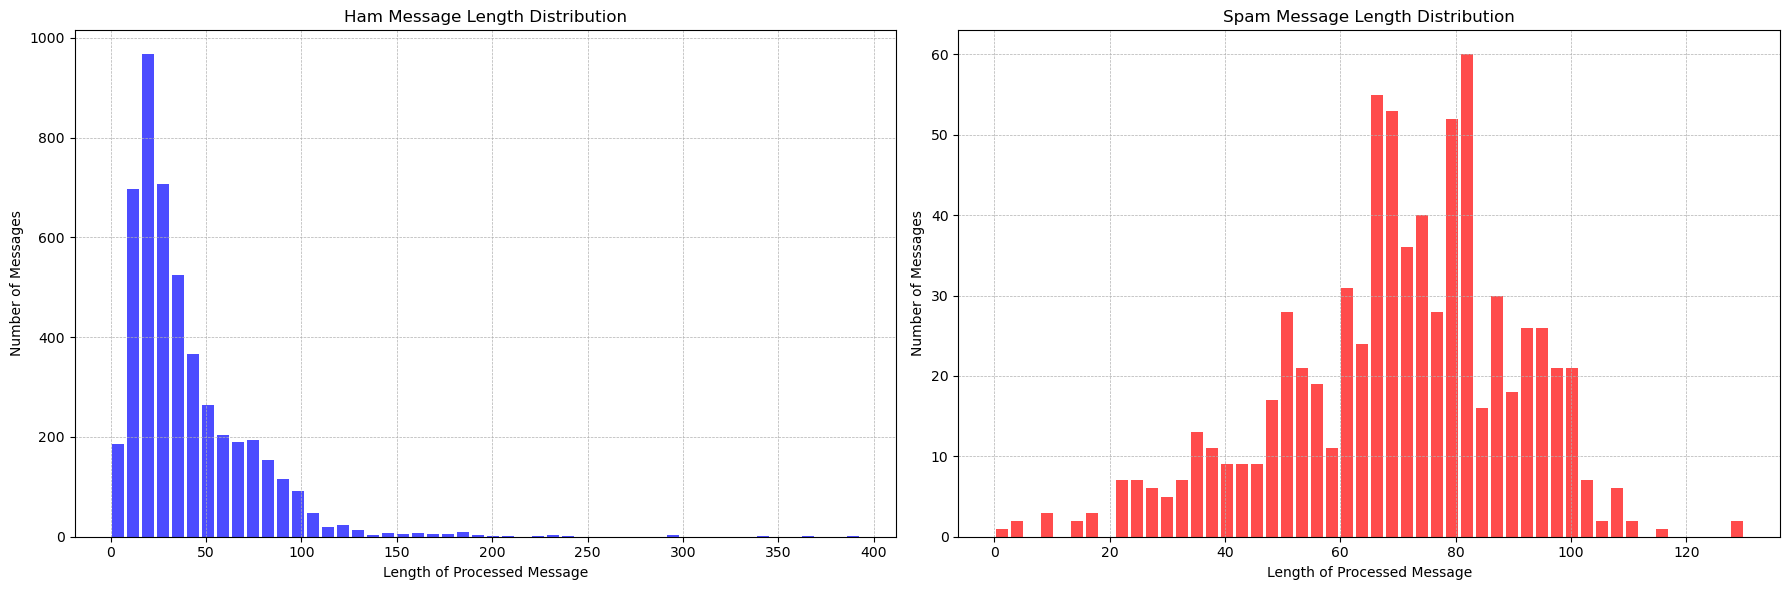

In [18]:
import matplotlib.pyplot as plt

data['processed_message_length'] = data['processed_message'].apply(len)

# Separate messages based on label
spam_lengths = data[data['label'] == 'spam']['processed_message_length']
ham_lengths = data[data['label'] == 'ham']['processed_message_length']


# Create a figure with two subplots (side by side) and set the figure size
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot histogram for ham messages
axs[0].hist(ham_lengths, bins=50, alpha=0.7, color='blue', rwidth=0.8)
axs[0].set_title('Ham Message Length Distribution')
axs[0].set_xlabel('Length of Processed Message')
axs[0].set_ylabel('Number of Messages')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot histogram for spam messages
axs[1].hist(spam_lengths, bins=50, alpha=0.7, color='red', rwidth=0.8)
axs[1].set_title('Spam Message Length Distribution')
axs[1].set_xlabel('Length of Processed Message')
axs[1].set_ylabel('Number of Messages')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

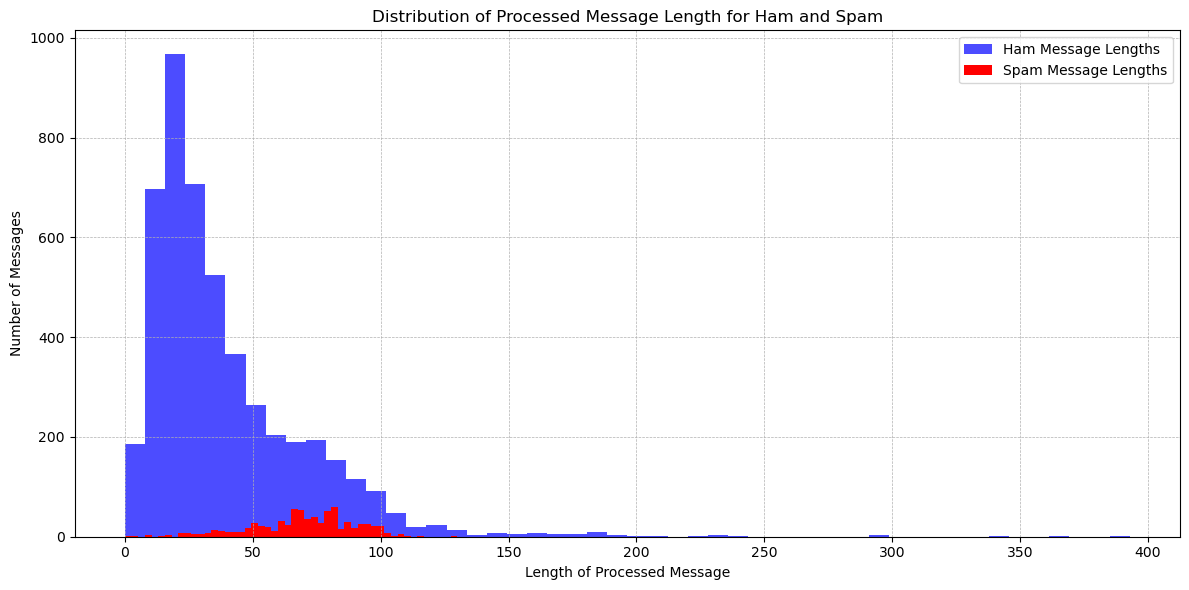

In [19]:
# Plot histograms
plt.figure(figsize=(12, 6))

plt.hist(ham_lengths, bins=50, alpha=0.7, color='blue', label='Ham Message Lengths')
plt.hist(spam_lengths, bins=50, alpha=1, color='red', label='Spam Message Lengths')

plt.xlabel('Length of Processed Message')
plt.ylabel('Number of Messages')
plt.title('Distribution of Processed Message Length for Ham and Spam')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Class balance graph

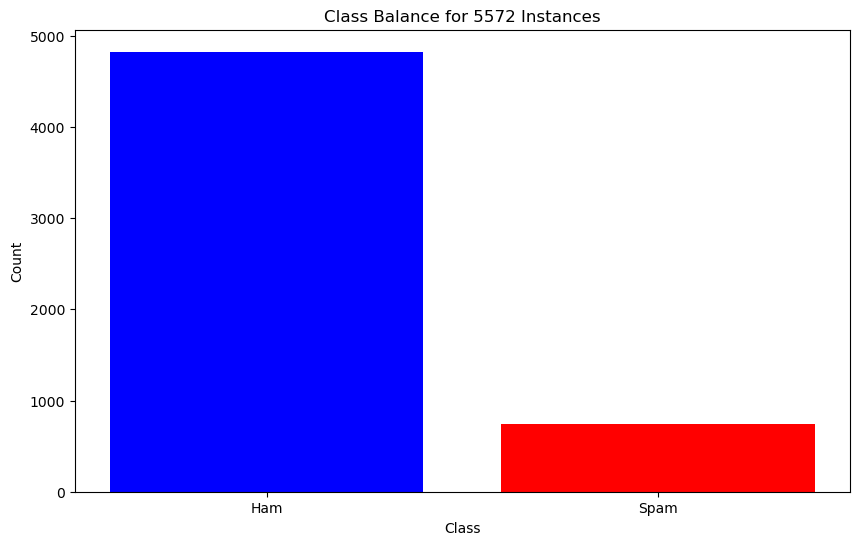

In [20]:
class_counts = data['label'].value_counts()

# Create a bar chart for class balance
plt.figure(figsize=(10, 6))

# Plotting the bar chart
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])

# Adding titles and labels
plt.title('Class Balance for {} Instances'.format(data.shape[0]))
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])  # Set the x-ticks to correspond to ham and spam

# Displaying the plot
plt.show()

## Feature engineering

### TF-IDF (Term Frequency-Inverse Document Frequency)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'message' column
tfidf_features = tfidf_vectorizer.fit_transform(data['processed_message'])

# Display the shape of the TF-IDF features
print(tfidf_features.shape)

(5572, 5886)


### Word vectors

In [22]:
import numpy as np

def load_glove_model(glove_file_path):
    """
    Loads the GloVe pre-trained word vectors from a file.
    :return: Dictionary mapping words to their GloVe vector representation.
    """
    print("Loading Glove Model")
    glove_model = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    print(f"Done. {len(glove_model)} words loaded!")
    return glove_model

In [23]:
# Function to create an averaged word vector for a single document
def document_vector(doc, model):
    """
    Creates an averaged word vector for a document (individual sms message).
    
    :param doc: List of words in the document.
    :param model: GloVe model dictionary.
    :return: Averaged vector representation of the document.
    """
    # Filter out words that are not in the model
    doc = [word for word in doc if word in model]
    # If no words in the doc are in the model, return a zero vector
    if len(doc) == 0:
        return np.zeros(next(iter(model.values())).shape)
    # Compute the mean of the vectors for words in the document
    return np.mean([model[word] for word in doc], axis=0)

In [24]:
def create_doc_vectors(corpus, model):
    """
    Processes a corpus of documents to create a vector representation for each.
    
    :return: Array of document vectors.
    """
    doc_vectors = []
    for doc in corpus:
        doc_vectors.append(document_vector(doc, model))
    return np.array(doc_vectors)

In [25]:
glove_file_path = '/Users/matthewpirie/Dropbox/Queens University/Year 3/Club + Other/QMIND/glove.6B/glove.6B.50d.txt'

glove_model = load_glove_model(glove_file_path)

Loading Glove Model
Done. 400000 words loaded!


In [26]:
preprocessed_corpus = [message.split() for message in data['processed_message']]

# Create document vectors
document_vectors = create_doc_vectors(preprocessed_corpus, glove_model)

# Checking the shape of the document vectors
print(document_vectors.shape)

(5572, 50)


# Training Models

## Traditional Machine Learning

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [51]:
# Split the dataset into training and testing sets; "tfidf_features" used as input data and "data['label']" used as targets assosiated with the input data
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, data['label'], test_size=0.3, random_state=42)

# Convert y_test to binary to use with roc_auc_score
y_test_binary = y_test.map({'ham': 0, 'spam': 1}).astype(int)

### MultinomialNB

In [70]:
# Initialize Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier_trained = nb_model.fit(X_train, y_train)

# Predict on the test set
nb_predictions = nb_classifier_trained.predict(X_test)

# Calculate metrics
nb_precision = precision_score(y_test, nb_predictions, average='weighted', zero_division=0)
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Metrics for Multinomial Naive Bayes Classifier:\n")

# Format and print metrics with four significant figures
print(f"  - Precision (weighted): {nb_precision:.4f}")
print(f"  - Recall (weighted): {nb_recall:.4f}")
print(f"  - F1-score (weighted): {nb_f1:.4f}")
print(f"  - Accuracy (weighted): {nb_accuracy:.4f}")
print(f"  - AUC: {nb_auc:.4f}")

# Get the predicted probabilities for the positive class
nb_probabilities = nb_classifier.predict_proba(X_test)[:, 1]

# Compute AUC
nb_auc = roc_auc_score(y_test_binary, nb_probabilities)

Metrics for Multinomial Naive Bayes Classifier:

  - Precision (weighted): 0.9669
  - Recall (weighted): 0.9659
  - F1-score (weighted): 0.9638
  - Accuracy (weighted): 0.9659
  - AUC: 0.9791


### MultinomialNB w/ Grid Search 

In [91]:
# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5]]  # Assuming binary classification (spam/ham)
}

# Initialize the Multinomial Naive Bayes classifier
nb_model = MultinomialNB()

# Initialize Grid Search with Cross-Validation
grid_search_cv = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_cv.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_

# Use the best estimator to make predictions
best_nb = grid_search_cv.best_estimator_
nb_predictions = best_nb.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, nb_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, nb_predictions, average='weighted')
f1 = f1_score(y_test, nb_predictions, average='weighted')
accuracy = accuracy_score(y_test, nb_predictions)

# Get the predicted probabilities for the positive class from the best estimator
best_nb_probabilities = best_nb.predict_proba(X_test)[:, 1]

# Compute AUC
best_nb_auc = roc_auc_score(y_test_binary, best_nb_probabilities)

# Print the model title and metrics
print("Multinomial Naive Bayes Model with Grid Search")
print("\n")
print(f"Best Parameters: {best_params}")
print(f"  - Best Score: {best_score:.4f}")
print(f"  - Precision (weighted): {precision:.4f}")
print(f"  - Recall (weighted): {recall:.4f}")
print(f"  - F1-score (weighted): {f1:.4f}")
print(f"  - Accuracy (weighted): {accuracy:.4f}")
print(f"  - AUC: {best_nb_auc:.4f}")

Multinomial Naive Bayes Model with Grid Search


Best Parameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}
  - Best Score: 0.9738
  - Precision (weighted): 0.9721
  - Recall (weighted): 0.9719
  - F1-score (weighted): 0.9720
  - Accuracy (weighted): 0.9719
  - AUC: 0.9870


### Logistic Regression 

In [75]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate metrics
logistic_precision = precision_score(y_test, logistic_predictions, average='weighted', zero_division=0)
logistic_recall = recall_score(y_test, logistic_predictions, average='weighted')
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# Get the predicted probabilities for the positive class
logistic_probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Compute AUC
logistic_auc = roc_auc_score(y_test_binary, logistic_probabilities)

# Print metrics with a clear title and formatted for readability
print("Metrics for Logistic Regression Classifier:\n")
print(f"  - Precision (weighted): {logistic_precision:.4f}")
print(f"  - Recall (weighted): {logistic_precision:.4f}")
print(f"  - F1-score (weighted): {logistic_precision:.4f}")
print(f"  - Accuracy (weighted): {logistic_precision:.4f}")
print(f"  - AUC:", logistic_auc)

Metrics for Logistic Regression Classifier:

  - Precision (weighted): 0.9626
  - Recall (weighted): 0.9626
  - F1-score (weighted): 0.9626
  - Accuracy (weighted): 0.9626
  - AUC: 0.9894589828334649


### Logistic Regression w/ Grid Search

In [93]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Norm used in penalization
    'solver': ['liblinear', 'saga']  # Algorithms that support both l1 and l2 penalties
}

# Initialize the Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)

# Initialize Grid Search with Cross-Validation
grid_search_cv_lr = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_cv_lr.fit(X_train, y_train)

# Get the best parameters and score
best_params_lr = grid_search_cv_lr.best_params_
best_score_lr = grid_search_cv_lr.best_score_

# Use the best estimator to make predictions
best_lr = grid_search_cv_lr.best_estimator_
lr_predictions = best_lr.predict(X_test)

# Calculate metrics
precision_lr = precision_score(y_test, lr_predictions, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, lr_predictions, average='weighted')
f1_lr = f1_score(y_test, lr_predictions, average='weighted')
accuracy_lr = accuracy_score(y_test, lr_predictions)

# Get the predicted probabilities for the positive class from the best estimator
best_lr_probabilities = best_lr.predict_proba(X_test)[:, 1]

# Compute AUC for binary classification tasks
best_lr_auc = roc_auc_score(y_test, best_lr_probabilities)  # Ensure y_test is appropriate for AUC calculation

# Print the model title and metrics
print("Logistic Regression Model with Grid Search")
print(f"Best Parameters: {best_params_lr}")
print("\n")
print(f"  - Best Score: {best_score_lr:.4f}")
print(f"  - Precision (weighted): {precision_lr:.4f}")
print(f"  - Recall (weighted): {recall_lr:.4f}")
print(f"  - F1-score (weighted): {f1_lr:.4f}")
print(f"  - Accuracy (weighted): {accuracy_lr:.4f}")
print(f"  - AUC: {best_lr_auc:.4f}")


/Users/matthewpirie/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/matthewpirie/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/matthewpirie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matthewpirie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matthewpirie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matthewpirie/opt/ana

Logistic Regression Model with Grid Search


Best Parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
  - Best Score: 0.9726
  - Precision (weighted): 0.9799
  - Recall (weighted): 0.9797
  - F1-score (weighted): 0.9790
  - Accuracy (weighted): 0.9797
  - AUC: 0.9903


### Support Vector Machine (SVM) 

In [73]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svm_classifier = SVC(probability=True, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm_classifier.predict(X_test)

# Calculate metrics
svm_precision = precision_score(y_test, svm_predictions, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Get the predicted probabilities for the positive class
svm_probabilities = svm_classifier.predict_proba(X_test)[:, 1]

# Compute AUC
svm_auc = roc_auc_score(y_test_binary, svm_probabilities)

# Print metrics with a clear title and formatted for readability
print("Metrics for Support Vector Machine (SVM) Classifier:\n")
print(f"  - Precision (weighted): {svm_precision:.4f}")
print(f"  - Recall (weighted): {svm_recall:.4f}")
print(f"  - F1-score (weighted): {svm_f1:.4f}")
print(f"  - Accuracy (weighted): {svm_accuracy:.4f}")
print(f"  - AUC: {svm_auc:.4f}")


Metrics for Support Vector Machine (SVM) Classifier:

  - Precision (weighted): 0.9760
  - Recall (weighted): 0.9755
  - F1-score (weighted): 0.9745
  - Accuracy (weighted): 0.9755
  - AUC: 0.9914


### Support Vector Machine (SVM) w/ Grid Search 

In [95]:
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Initialize the SVM classifier
svm_model = SVC(probability=True)  # Enable probability estimates

# Initialize Grid Search with Cross-Validation
grid_search_cv_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_cv_svm.fit(X_train, y_train)

# Get the best parameters and score
best_params_svm = grid_search_cv_svm.best_params_
best_score_svm = grid_search_cv_svm.best_score_

# Use the best estimator to make predictions
best_svm = grid_search_cv_svm.best_estimator_
svm_predictions = best_svm.predict(X_test)

# Calculate metrics
precision_svm = precision_score(y_test, svm_predictions, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, svm_predictions, average='weighted')
f1_svm = f1_score(y_test, svm_predictions, average='weighted')
accuracy_svm = accuracy_score(y_test, svm_predictions)

# Get the predicted probabilities for the positive class from the best estimator
best_svm_probabilities = best_svm.predict_proba(X_test)[:, 1]

# Compute AUC for binary classification tasks
best_svm_auc = roc_auc_score(y_test, best_svm_probabilities)  # Ensure y_test is appropriate for AUC calculation

# Print the model title and metrics
print("Support Vector Machine Model with Grid Search")
print(f"Best Parameters: {best_params_svm}")
print("\n")
print(f"  - Best Score: {best_score_svm:.4f}")
print(f"  - Precision (weighted): {precision_svm:.4f}")
print(f"  - Recall (weighted): {recall_svm:.4f}")
print(f"  - F1-score (weighted): {f1_svm:.4f}")
print(f"  - Accuracy (weighted): {accuracy_svm:.4f}")
print(f"  - AUC: {best_svm_auc:.4f}")

Support Vector Machine Model with Grid Search
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


  - Best Score: 0.9767
  - Precision (weighted): 0.9807
  - Recall (weighted): 0.9809
  - F1-score (weighted): 0.9806
  - Accuracy (weighted): 0.9809
  - AUC: 0.9873


### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate metrics
rf_precision = precision_score(y_test, rf_predictions, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Get the predicted probabilities for the positive class
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]

# Compute AUC
rf_auc = roc_auc_score(y_test_binary, rf_probabilities)

print("Metrics for Random Forest Classifier:\n")
print(f"  - Precision (weighted): {rf_precision:.4f}")
print(f"  - Recall (weighted): {rf_recall:.4f}")
print(f"  - F1-score (weighted): {rf_f1:.4f}")
print(f"  - Accuracy (weighted): {rf_accuracy:.4f}")
print(f"  - AUC: {rf_auc:.4f}")

Metrics for Random Forest Classifier:

  - Precision (weighted): 0.9773
  - Recall (weighted): 0.9767
  - F1-score (weighted): 0.9757
  - Accuracy (weighted): 0.9767
  - AUC: 0.9949


### Random Forest w/ Grid Search 

In [97]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Initialize Grid Search with Cross-Validation
grid_search_cv_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_cv_rf.fit(X_train, y_train)

# Get the best parameters and score
best_params_rf = grid_search_cv_rf.best_params_
best_score_rf = grid_search_cv_rf.best_score_

# Use the best estimator to make predictions
best_rf = grid_search_cv_rf.best_estimator_
rf_predictions = best_rf.predict(X_test)

# Calculate metrics
precision_rf = precision_score(y_test, rf_predictions, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, rf_predictions, average='weighted')
f1_rf = f1_score(y_test, rf_predictions, average='weighted')
accuracy_rf = accuracy_score(y_test, rf_predictions)

# Since Random Forest is not naturally a probabilistic model, we use the class probabilities to compute an AUC score for binary classification tasks
best_rf_probabilities = best_rf.predict_proba(X_test)[:, 1]
best_rf_auc = roc_auc_score(y_test, best_rf_probabilities)  # Ensure y_test is appropriate for AUC calculation

# Print the model title and metrics
print("Random Forest Model with Grid Search")
print("\n")
print(f"Best Parameters: {best_params_rf}")
print(f"  - Best Score: {best_score_rf:.4f}")
print(f"  - Precision (weighted): {precision_rf:.4f}")
print(f"  - Recall (weighted): {recall_rf:.4f}")
print(f"  - F1-score (weighted): {f1_rf:.4f}")
print(f"  - Accuracy (weighted): {accuracy_rf:.4f}")
print(f"  - AUC: {best_rf_auc:.4f}")


Random Forest Model with Grid Search


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
  - Best Score: 0.9736
  - Precision (weighted): 0.9796
  - Recall (weighted): 0.9791
  - F1-score (weighted): 0.9783
  - Accuracy (weighted): 0.9791
  - AUC: 0.9938


### AdaBoost

In [98]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
ab_classifier = AdaBoostClassifier(random_state=42, n_estimators=100)

# Train the classifier
ab_classifier.fit(X_train, y_train)

# Predict on the test set
ab_predictions = ab_classifier.predict(X_test)

# Calculate metrics
ab_precision = precision_score(y_test, ab_predictions, average='weighted', zero_division=0)
ab_recall = recall_score(y_test, ab_predictions, average='weighted')
ab_f1 = f1_score(y_test, ab_predictions, average='weighted')
ab_accuracy = accuracy_score(y_test, ab_predictions)

# AdaBoost does not directly provide a predict_proba method for SVC,
# but it does for its own classifiers, so we can compute AUC as usual
ab_probabilities = ab_classifier.predict_proba(X_test)[:, 1]

# Compute AUC
ab_auc = roc_auc_score(y_test_binary, ab_probabilities)

# Print metrics
print("Metrics for AdaBoost Classifier:\n")
print(f"  - AdaBoost Precision (weighted): {ab_precision:.4f}")
print(f"  - AdaBoost Recall (weighted): {ab_recall:.4f}")
print(f"  - AdaBoost F1-score (weighted): {ab_f1:.4f}")
print(f"  - AdaBoost Accuracy (weighted): {ab_accuracy:.4f}")
print(f"  - AdaBoost AUC: {ab_auc:.4f}")

Metrics for AdaBoost Classifier:

  - AdaBoost Precision (weighted): 0.9726
  - AdaBoost Recall (weighted): 0.9731
  - AdaBoost F1-score (weighted): 0.9726
  - AdaBoost Accuracy (weighted): 0.9731
  - AdaBoost AUC: 0.9710


### AdaBoost w/ Grid Search 

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1]  # Contribution of each weak learner
}

# Initialize the AdaBoost classifier
ab_model = AdaBoostClassifier()

# Initialize Grid Search with Cross-Validation
grid_search_cv_ab = GridSearchCV(ab_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_cv_ab.fit(X_train, y_train)

# Get the best parameters and score
best_params_ab = grid_search_cv_ab.best_params_
best_score_ab = grid_search_cv_ab.best_score_

# Use the best estimator to make predictions
best_ab = grid_search_cv_ab.best_estimator_
ab_predictions = best_ab.predict(X_test)

# Calculate metrics
precision_ab = precision_score(y_test, ab_predictions, average='weighted', zero_division=0)
recall_ab = recall_score(y_test, ab_predictions, average='weighted')
f1_ab = f1_score(y_test, ab_predictions, average='weighted')
accuracy_ab = accuracy_score(y_test, ab_predictions)

# Since AdaBoost supports probability estimates, we can compute an AUC score for binary classification tasks
best_ab_probabilities = best_ab.predict_proba(X_test)[:, 1]
best_ab_auc = roc_auc_score(y_test, best_ab_probabilities)  # Ensure y_test is appropriate for AUC calculation

# Print the model title and metrics
print("AdaBoost Model with Grid Search")
print("\n")
print(f"Best Parameters: {best_params_ab}")
print(f"  - Best Score: {best_score_ab:.4f}")
print(f"  - Precision (weighted): {precision_ab:.4f}")
print(f"  - Recall (weighted): {recall_ab:.4f}")
print(f"  - F1-score (weighted): {f1_ab:.4f}")
print(f"  - Accuracy (weighted): {accuracy_ab:.4f}")
print(f"  - AUC: {best_ab_auc:.4f}")


AdaBoost Model with Grid Search


Best Parameters: {'learning_rate': 1, 'n_estimators': 200}
  - Best Score: 0.9700
  - Precision (weighted): 0.9708
  - Recall (weighted): 0.9713
  - F1-score (weighted): 0.9709
  - Accuracy (weighted): 0.9713
  - AUC: 0.9701


## Saving Models

In [84]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [101]:
from joblib import dump, load

# Save the nb classifier model
dump(best_nb, 'Saved_multinomial_nb_classifier.joblib')

# Save the Logistic Regression model
dump(best_lr, 'Saved_logistic_regression_classifier.joblib')

# Save the Support Vector Machine (SVC) model
dump(best_svm, 'Saved_svm_classifier.joblib')

# Save the Random Forest model
dump(best_rf, 'Saved_random_forest_classifier.joblib')

# Save the AdaBoost model
dump(best_ab, 'Saved_adaboost_classifier.joblib')

['Saved_adaboost_classifier.joblib']